In [1]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import datetime
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Cargo los datos y sets

In [2]:
training_labels = pd.read_csv("labels_training_set.csv", low_memory=False)
labels_predict = pd.read_csv("trocafone_kaggle_test.csv", low_memory=False)
events_data = pd.read_csv("data_set.csv", low_memory = False)

### Comenzamos con el set de entrenamiento

In [3]:
set_entrenamiento = pd.merge(events_data, training_labels, on ='person', how = 'inner')

In [4]:
set_entrenamiento = set_entrenamiento.drop(columns = ['person'])
set_entrenamiento.head()

,sessions,total_time,mean_time_by_session,Direct,Email,Organic,Paid,Referral,Social,Unknown,...,lead,search engine hit,searched products,staticpage,viewed product,visited site,promedio dias,promedio hora,retornos,label
0,1,35.0,35.000000,0,0,0,1,0,0,0,...,0,0,0,0,1,1,31.000000,23.000000,1,0
1,1,10.0,10.000000,0,0,0,1,0,0,0,...,0,0,0,0,1,1,29.000000,13.000000,1,0
2,3,404.0,134.666667,0,0,0,0,2,0,0,...,0,0,0,0,0,2,17.000000,14.333333,2,0
3,34,14890.0,437.941176,25,0,0,8,1,0,0,...,0,0,0,0,372,34,16.732143,7.006696,34,0
4,1,347.0,347.000000,0,0,0,1,0,0,0,...,0,0,0,0,3,1,26.000000,14.000000,1,0


In [5]:
X = set_entrenamiento.drop(columns = ['label'])
y = set_entrenamiento["label"]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

In [7]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [8]:
xg_reg = xgb.XGBRegressor(objective ='binary:logistic', 
                colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 5, n_estimators = 30)

In [9]:
xg_reg.fit(x_train,y_train)

XGBRegressor(alpha=5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=30,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [10]:
preds = xg_reg.predict(x_test)
preds = preds.tolist()
df = pd.DataFrame(preds)
media = df[0].mean()
df.describe()

,0
count,26582.000000
mean,0.095584
std,0.172765
min,0.026767
25%,0.031717
50%,0.040282
75%,0.060005
max,0.966006


In [11]:
df = df[0].map(lambda x: 1 if x > 0.227256 else 0);
df = df.to_frame()
df.rename(columns = {0: 'label'},inplace = True) 

In [12]:
df['label'].value_counts() #0.227256

0    24447
1     2135
Name: label, dtype: int64

In [13]:
accuracy_score(df,y_test)

0.9957113836430668

### Comenzamos con el set de test

In [14]:
set_test = pd.merge(events_data,labels_predict,on = "person", how = "right")
set_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19415 entries, 0 to 19414
Data columns (total 25 columns):
person                  19415 non-null object
sessions                19415 non-null int64
total_time              19415 non-null float64
mean_time_by_session    19415 non-null float64
Direct                  19415 non-null int64
Email                   19415 non-null int64
Organic                 19415 non-null int64
Paid                    19415 non-null int64
Referral                19415 non-null int64
Social                  19415 non-null int64
Unknown                 19415 non-null int64
ad campaign hit         19415 non-null int64
brand listing           19415 non-null int64
checkout                19415 non-null int64
conversion              19415 non-null int64
generic listing         19415 non-null int64
lead                    19415 non-null int64
search engine hit       19415 non-null int64
searched products       19415 non-null int64
staticpage              19415 n

In [15]:
personas = set_test["person"]
set_test = set_test.drop(columns=['person'])
set_test = set_test.fillna(0)

In [16]:
predicts_kaggel = xg_reg.predict(set_test)
set_test.tail()

,sessions,total_time,mean_time_by_session,Direct,Email,Organic,Paid,Referral,Social,Unknown,...,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site,promedio dias,promedio hora,retornos
19410,1,613.0,613.0,0,0,1,0,0,0,0,...,0,0,1,0,0,19,1,28.000000,14.476190,1
19411,1,16.0,16.0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,22.000000,17.000000,1
19412,1,0.0,0.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,18.000000,19.000000,1
19413,10,4660.0,466.0,0,0,7,3,0,0,0,...,12,0,12,8,3,42,10,11.010309,17.896907,10
19414,1,143.0,143.0,0,0,0,1,0,0,0,...,0,0,1,0,0,4,1,17.000000,22.000000,1


In [17]:
predicts_kaggel = predicts_kaggel.tolist()
df_kaggel = pd.DataFrame(predicts_kaggel)
df_kaggel.head()

,0
0,0.117628
1,0.034150
2,0.659746
3,0.096803
4,0.068072


In [18]:
df_kaggel[0].describe()

count    19415.000000
mean         0.120420
std          0.202165
min          0.026767
25%          0.034101
50%          0.045465
75%          0.073236
max          0.964445
Name: 0, dtype: float64

In [19]:
df_kaggel = df_kaggel[0].map(lambda x: 1 if x > 0.227256 else 0);
df_kaggel = df_kaggel.to_frame()
df_kaggel["person"] = personas
df_kaggel.rename(columns = {0: 'label'},inplace = True) 

In [20]:
df_kaggel = df_kaggel[['person','label']]

### Vemos resultados y pasamos a un csv

In [21]:
df_kaggel['label'].value_counts()

0    17200
1     2215
Name: label, dtype: int64

In [22]:
df_kaggel.to_csv('Resultados_xgb.csv',index=False)

### Vemos la importancia de cada feature

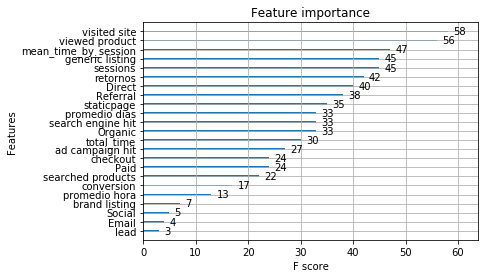

In [25]:
import matplotlib.pyplot as plt
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [30, 30]
plt.show()

In [24]:
#Pruebas anteriores
#marcas + condicion + color + storage + promedio dias+ promedio horas = malo (color aportaba muy poco) #0.74"
#marcas + condicion + storage + promedio dias+ promedio horas = safa (0.76110)
#condicion + storage + promedio dias+ promedio horas =  (0.76409)
#condicion + promedio dias+ promedio horas =  (0.76688)
# 6759
#
#